In [1]:
import pandas as pd
import numpy as np

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
data = pd.read_csv(uri)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
trade = {
    1 : 0,
    0 : 1
}

data['finished'] = data.unfinished.map(trade)
data.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

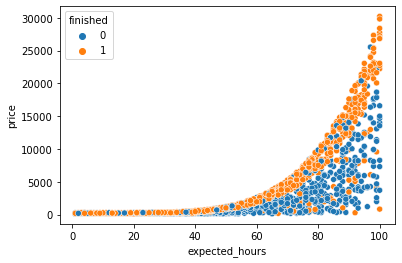

In [3]:
import seaborn as sns

sns.scatterplot(x="expected_hours", y="price", hue="finished", data=data)

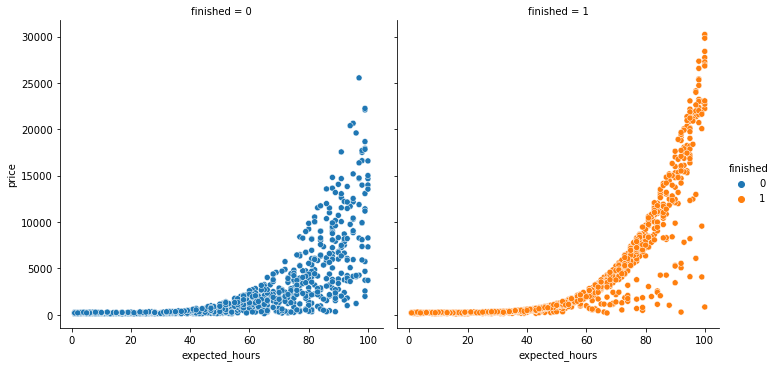

In [4]:
sns.relplot(x="expected_hours", y="price", col="finished", hue="finished", data=data)

In [5]:
x = data[['expected_hours', 'price']]
y = data['finished']



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20
np.random.seed(SEED)

practice_x, test_x, practice_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

model = LinearSVC()
model.fit(practice_x, practice_y)
predictions = model.predict(test_x)

accuracy_rate = accuracy_score(test_y, predictions)*100
accuracy_rate

G:\SoftwaresEng\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


51.48148148148148

In [7]:
import numpy as np
base_predictions = np.ones(540)
accuracy_rate = accuracy_score(test_y, base_predictions)*100
accuracy_rate

52.59259259259259

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

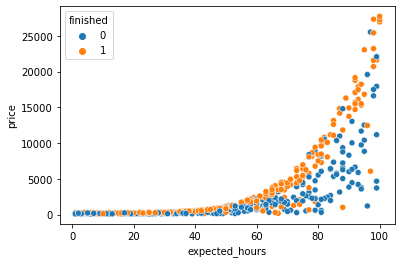

In [8]:
sns.scatterplot(x="expected_hours", y="price", hue=test_y, data=test_x)

In [9]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()

print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [10]:
pixels= 100
axis_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
axis_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [11]:
xx, yy = np.meshgrid(axis_x, axis_y)
points = np.c_[xx.ravel(), yy.ravel()]
points

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [12]:
z = model.predict(points)
z = z.reshape(xx.shape)
z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

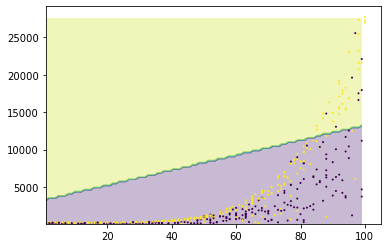

In [13]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)

#decision boundary

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 20
np.random.seed(SEED)

practice_x, test_x, practice_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

model = SVC(gamma='auto')
model.fit(practice_x, practice_y)
predictions = model.predict(test_x)

accuracy_rate = accuracy_score(test_y, predictions)*100
accuracy_rate

58.88888888888889

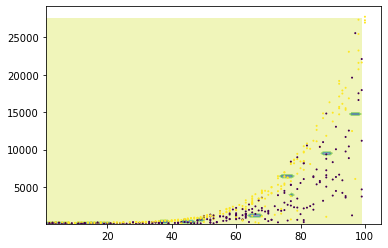

In [15]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()
pixels= 100
axis_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
axis_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(axis_x, axis_y)
points = np.c_[xx.ravel(), yy.ravel()]
z = model.predict(points)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)


In [18]:
from sklearn.preprocessing import StandardScaler

SEED = 20
np.random.seed(SEED)

raw_practice_x, raw_test_x, practice_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

scaler = StandardScaler()
scaler.fit(raw_practice_x)
practice_x = scaler.transform(raw_practice_x) 
test_x = scaler.transform(raw_test_x)

model = SVC(gamma='auto')
model.fit(practice_x, practice_y)
predictions = model.predict(test_x)

accuracy_rate = accuracy_score(test_y, predictions)*100
accuracy_rate

70.37037037037037

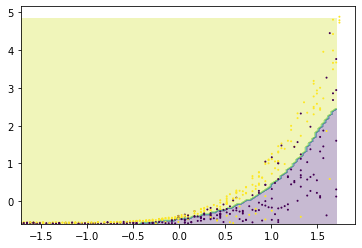

In [21]:
data_x = test_x[:,0]
data_y = test_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
pixels= 100
axis_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
axis_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(axis_x, axis_y)
points = np.c_[xx.ravel(), yy.ravel()]
z = model.predict(points)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)
